# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

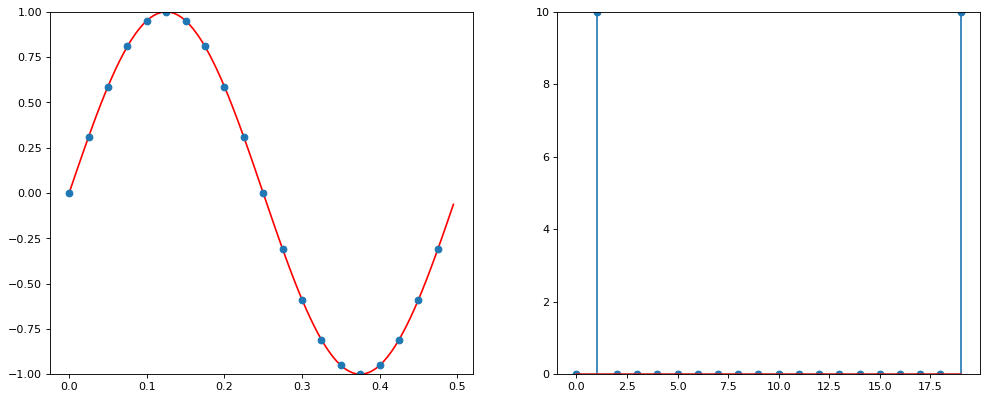

In [1]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*np.sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft.fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [8]:
# Zdefiniuj funckję
def signals(A = 1, LP = 1, w = 40, f = 2.0):
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    #FUNC = lambda t : A*np.sin(2*pi*t*f)
    
    FUNC = lambda t : A*np.sin(2*pi*t*f + pi/4)  
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana
    
    #Zadanie 3 
    #base_t = np.arange(0, LP*T, 1.0/200.0)
    #base_signal = FUNC(base_t)
      
    #for i in range(100):
    #    amp = random.uniform(0.02, 0.08)
    #    freq = random.uniform(5.0, 10.0)
    #    phase = random.uniform(0.0, 2.0*pi)
    #    FUNC_temp = lambda t : amp * np.sin(2*pi*t*freq + phase)
    #    signal = signal + FUNC_temp(t)
    #    base_signal = base_signal + FUNC_temp(base_t)
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("y = sygnał(x)")
    ax.plot(t, signal, 'o')
    
    signal1 = fft.fft(signal)
    #print(signal1)
    print(angle(signal1, deg=True))
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)/(0.5*n)
    #print(angle(signal1, deg=True))
    # modul sygnalu

    freqs = [w/n*i for i in range(n)]

    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    ax.set_xlabel("Częstotliwość [Hz]")
    ax.set_ylabel("Amplituda")
    
    show()

b) Zmień częstotliwość próbkowania na 50Hz.

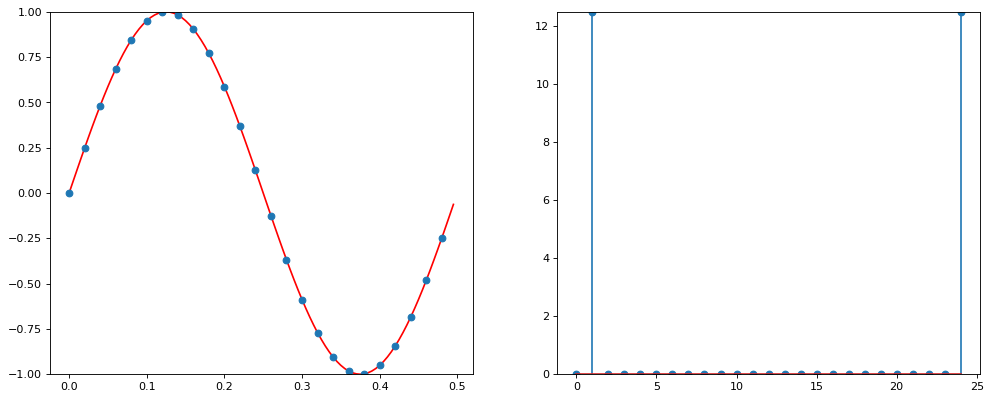

In [18]:
# w=50
signals(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

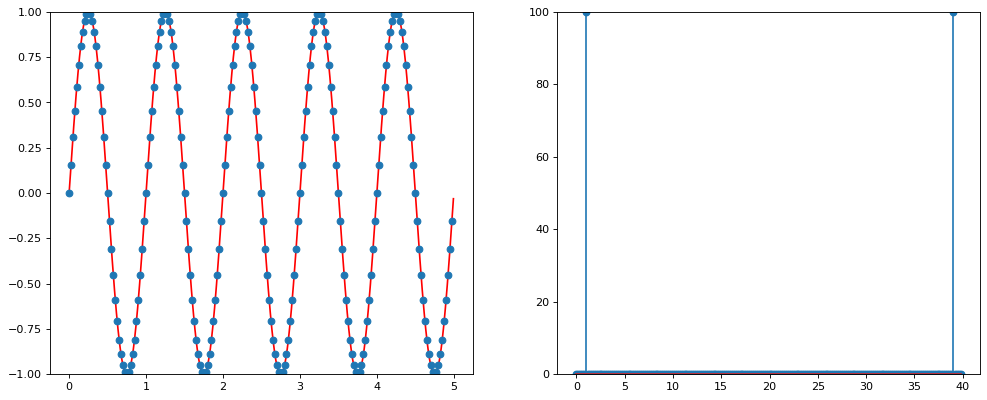

In [20]:
# popraw oś OX
signals(f=1.0, LP=5)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

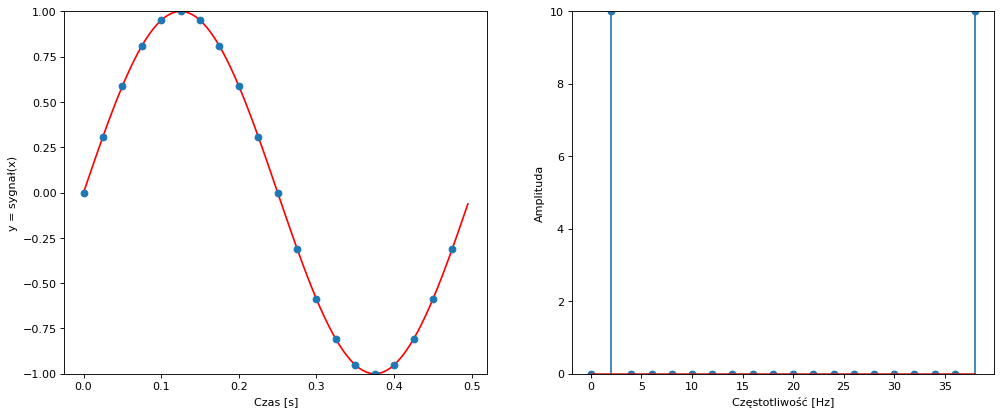

In [22]:
# Podpisz osie wykresów
signals()

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

Jest wprost proporcjonalna do amplitudy (A)

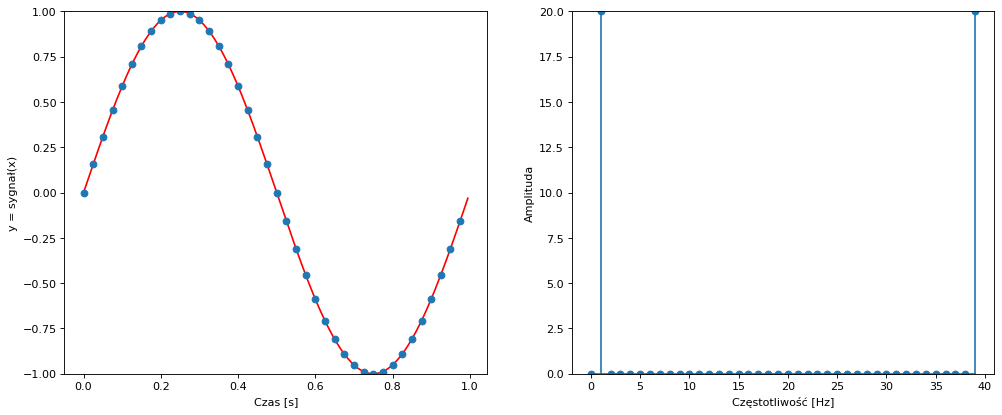

In [23]:
# f=1, A=1, LP=1
signals(f=1.0)

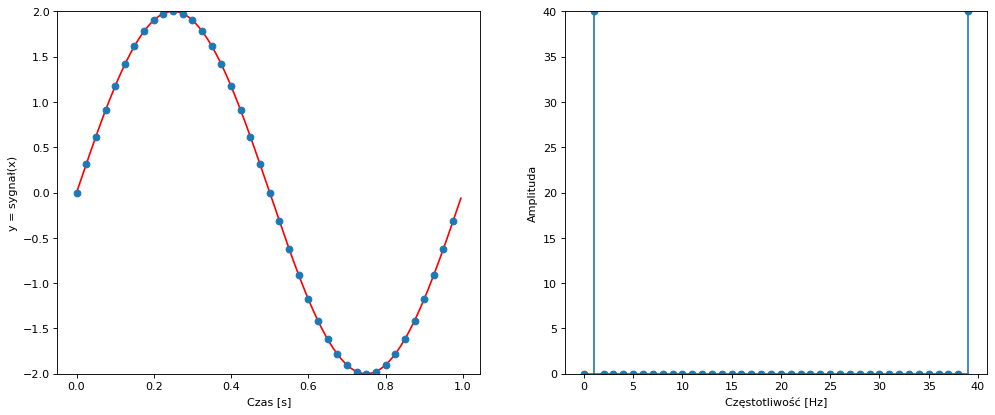

In [24]:
# f=1, A=2, LP=1
signals(f=1.0, A=2)

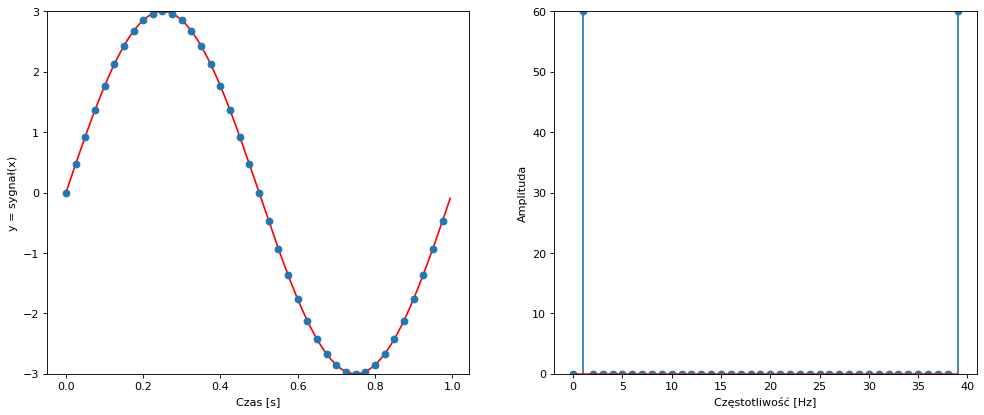

In [25]:
# f=1, A=3, LP=1
signals(f=1.0, A=3)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

50 punktów\
Wartości na osi OY zależą również od częstotliwości próbkowania $0.5*w$

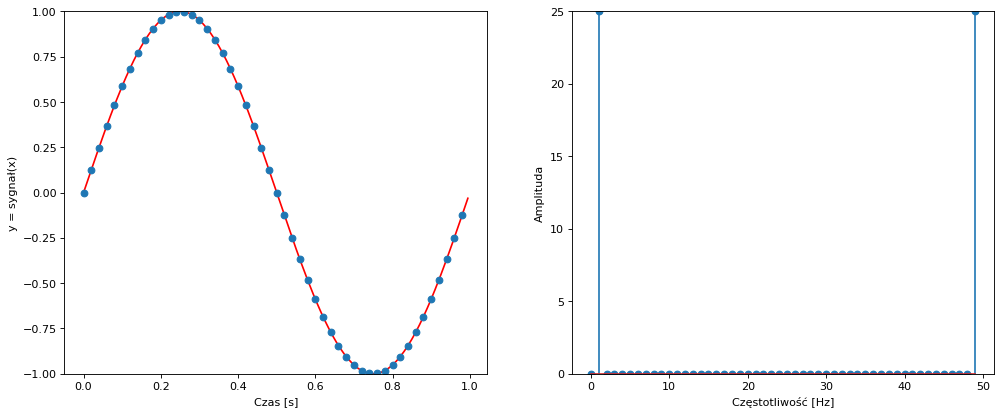

In [26]:
# f=1, w=50, LP=1
signals(f=1.0, w=50)

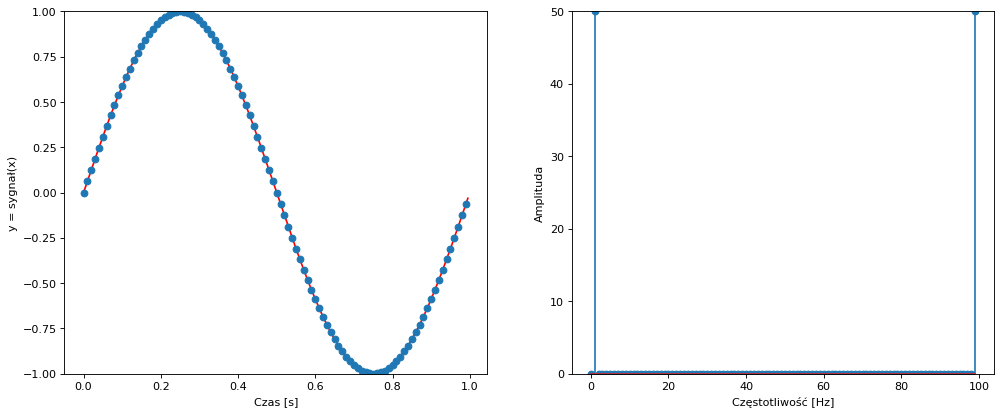

In [27]:
# f=1, w=100, LP=1
signals(f=1.0, w=100)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

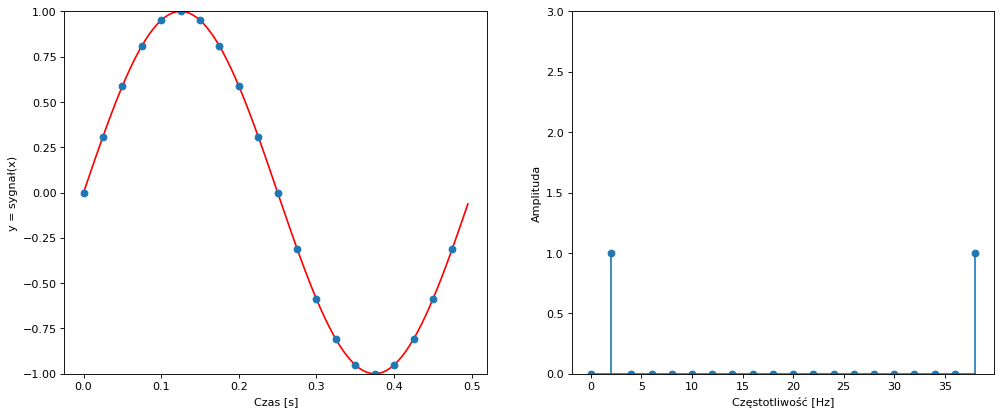

In [29]:
# popraw oś OY
signals()

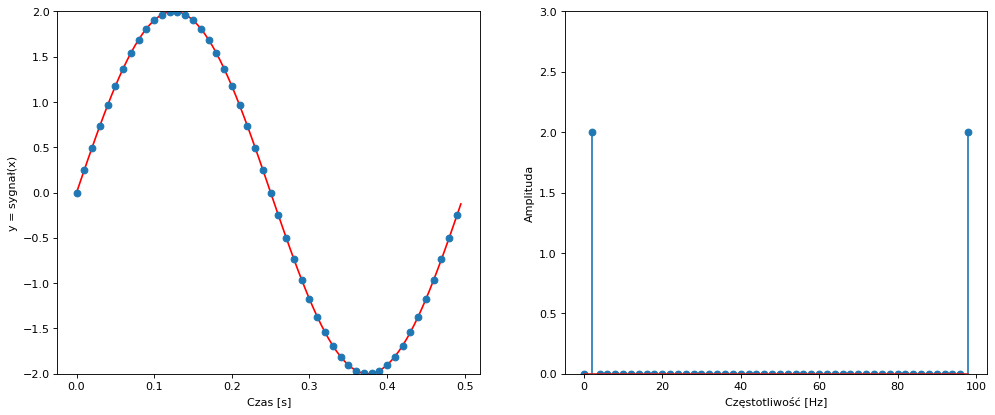

In [30]:
signals(A=2, w=100)

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

Uzyskana częstotliwość - 1Hz. Zachodzi aliasing - częstotliwośc próbkowania jest niewystarczająca.

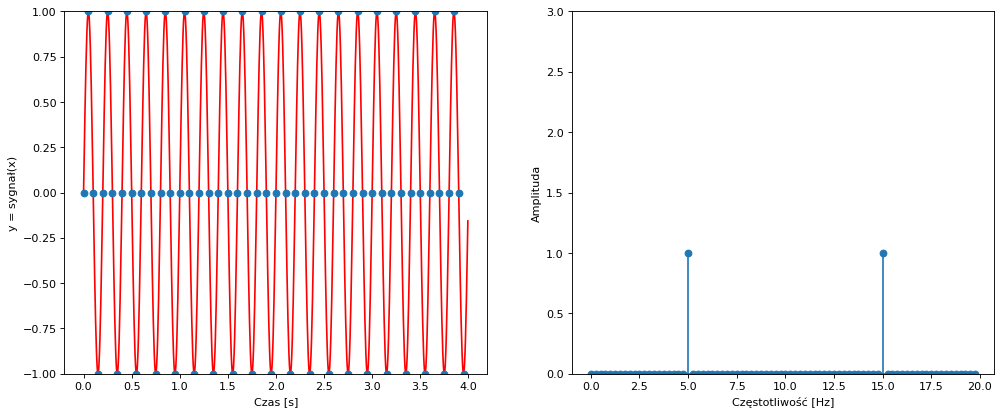

In [31]:
# f=5, w=20, LP=20
signals(f=5.0, w=20, LP=20)

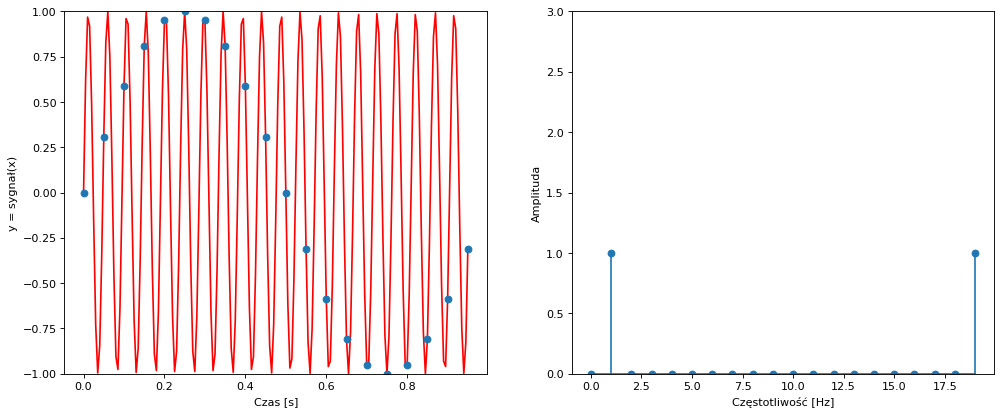

In [32]:
# f=21, w=20, LP=20
signals(f=21.0, w=20, LP=20)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

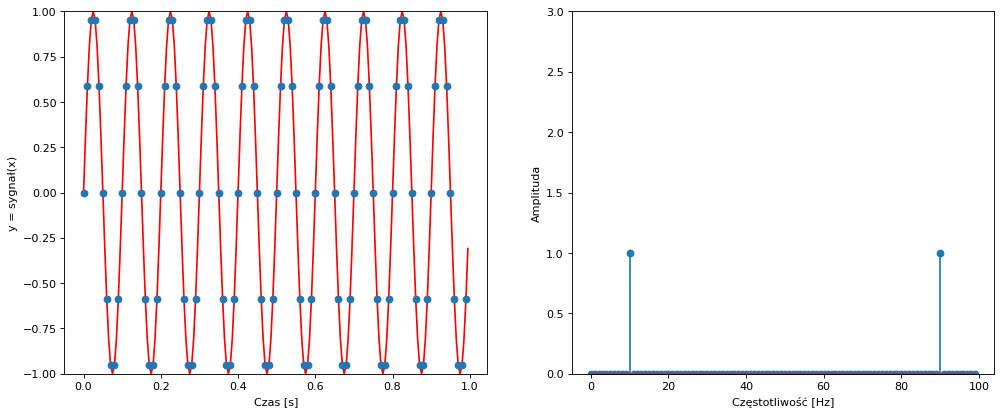

In [34]:
# f=10, w=100, A=1, LP=10
signals(f=10.0, w=100, LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

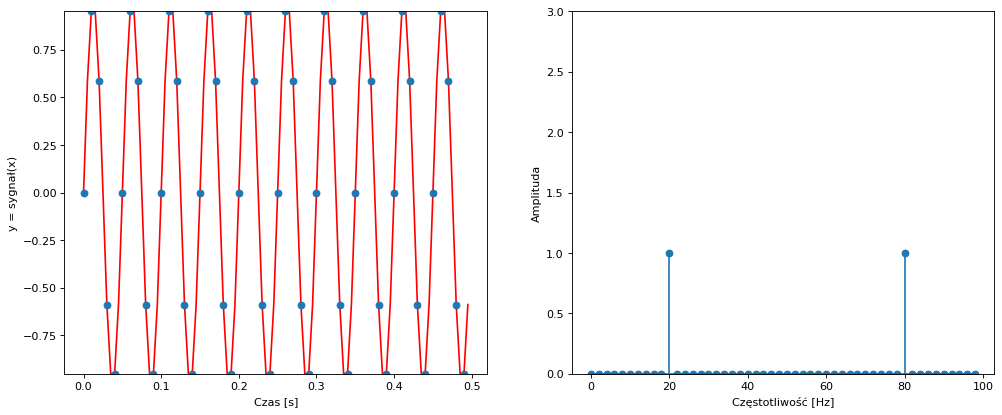

In [35]:
# f=20, w=100, A=1, LP=10
signals(f=20.0, w=100, LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

Specyficzna częstotliwość nie pokrywa się dokładnie z żadną z częstotliwości w bazie wektorów Fourierowskich

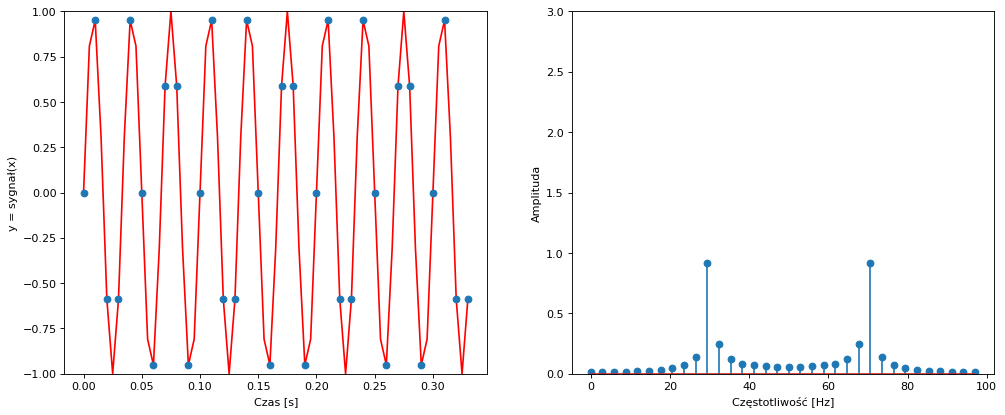

In [36]:
# f=30, w=100, A=1, LP=10
signals(f=30, w=100, LP=10)

iv) $sin(2*pi*t*f)$, $f=40Hz$

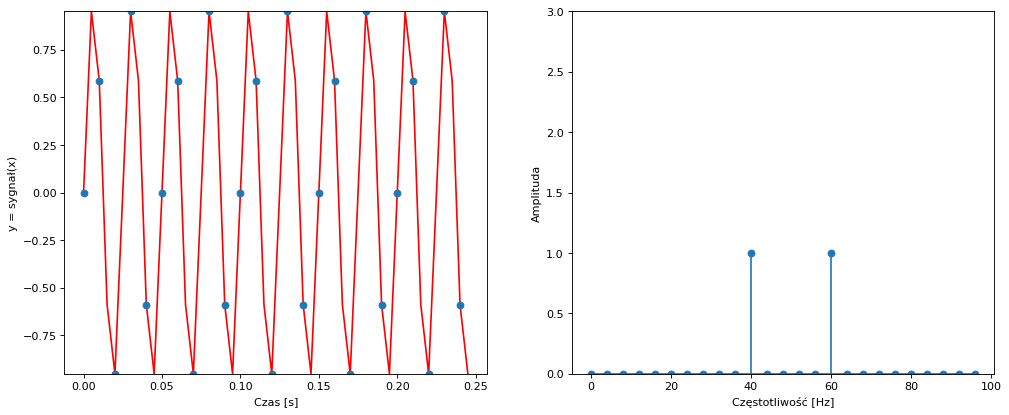

In [37]:
# f=40, w=100, A=1, LP=10
signals(f=40, w=100, LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

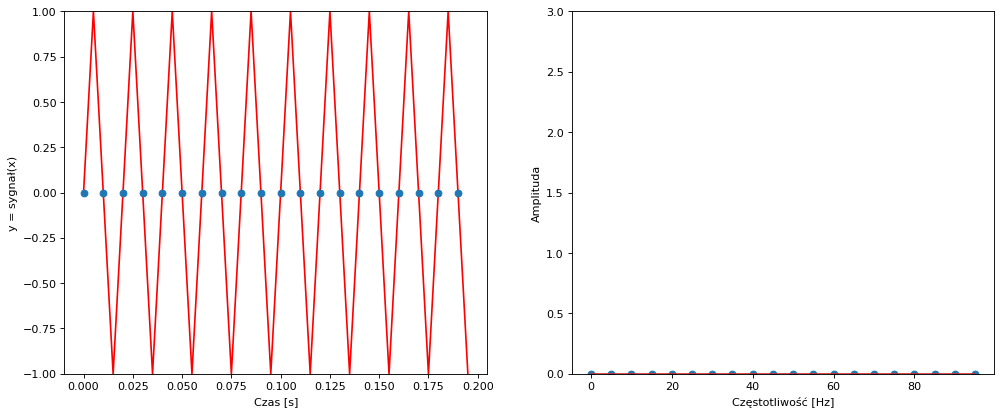

In [38]:
# f=50, w=100, A=1, LP=10
signals(f=50, w=100, LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

Twierdzenie Kotielnikowa-Shannona

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

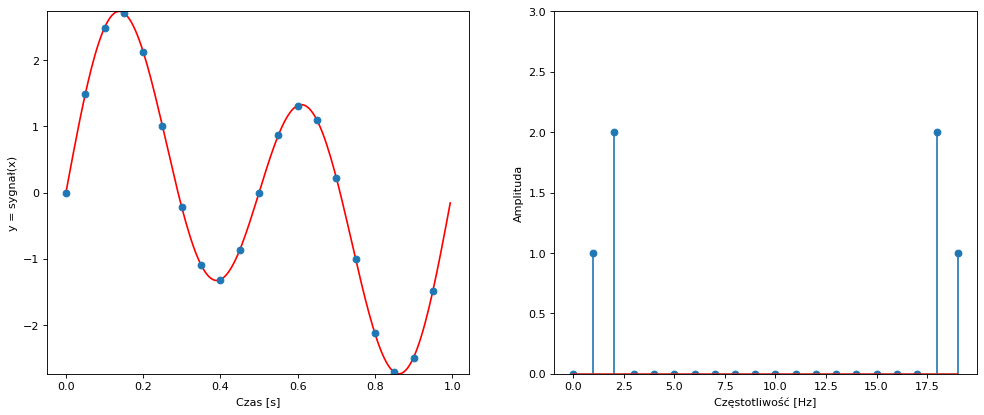

In [45]:
# Wyrysuj sygnał
signals(f=1.0, w=20)

Na widmie można odczytać częstotliwość bazowego przebiegu $sin(2*\pi*t)$ można odfiltrować wszystkie częstotliwości mniejsze niż $0.5$ co pozostawi jedynie funkcję bazową

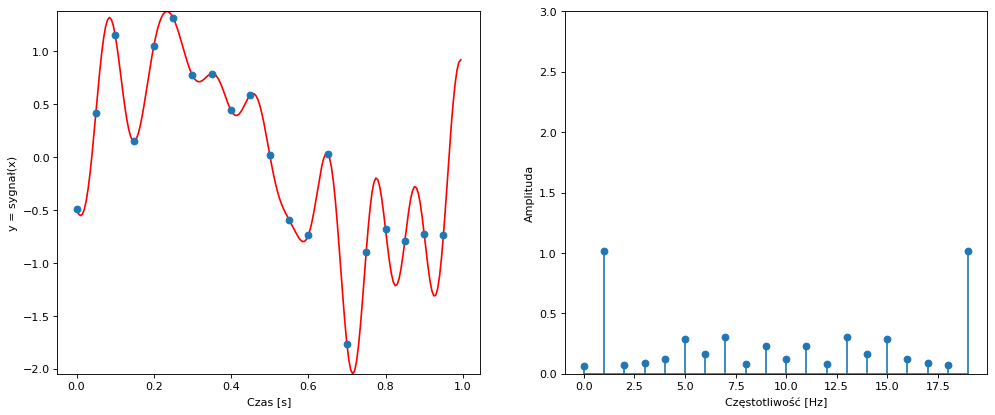

In [47]:
signals(f=1.0, w=20)

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

Tak reprezentuje składową rzeczywistą sygnału. Jest dwa razy większy ze względu na symetrię.

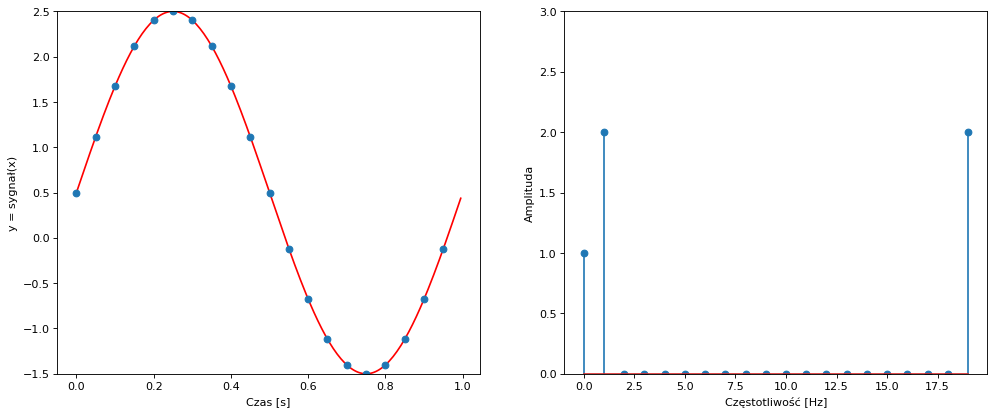

In [50]:
# Wyrysuj sygnał
signals(f=1.0, w=20, A=2)

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

Można ją znaleźć w części urojonej drugiej wartości tablicy. W drugim przypadku wynosi ona ok $7.02$ co w przybliżeniu jest równoważne $2\pi + \pi/4$ czyli faktycznemu przesunięciu wprowadzonemu w funkcji

C:\Users\weron\Miniconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: scipy.angle is deprecated and will be removed in SciPy 2.0.0, use numpy.angle instead


[-180.          -90.          136.83676759  -95.18159659    0.
  -96.00900596    0.           40.87936219   31.02458614  133.15238973
 -180.         -133.15238973  -31.02458614  -40.87936219   -0.
   96.00900596   -0.           95.18159659 -136.83676759   90.        ]


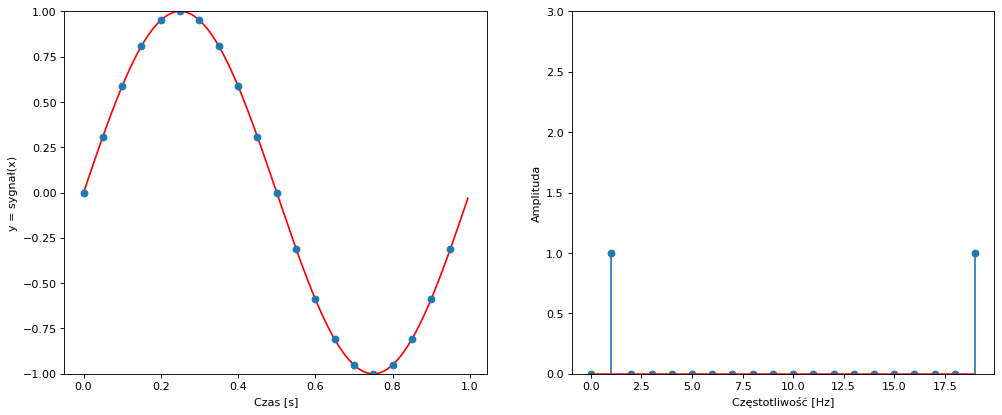

In [7]:
# faza = 0
signals(f=1.0, w=20)

C:\Users\weron\Miniconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: scipy.angle is deprecated and will be removed in SciPy 2.0.0, use numpy.angle instead


[-180.          -45.          115.75060489 -154.08937024  180.
  -80.53767779    0.            7.18277214   51.97889036   90.
 -180.          -90.          -51.97889036   -7.18277214   -0.
   80.53767779 -180.          154.08937024 -115.75060489   45.        ]


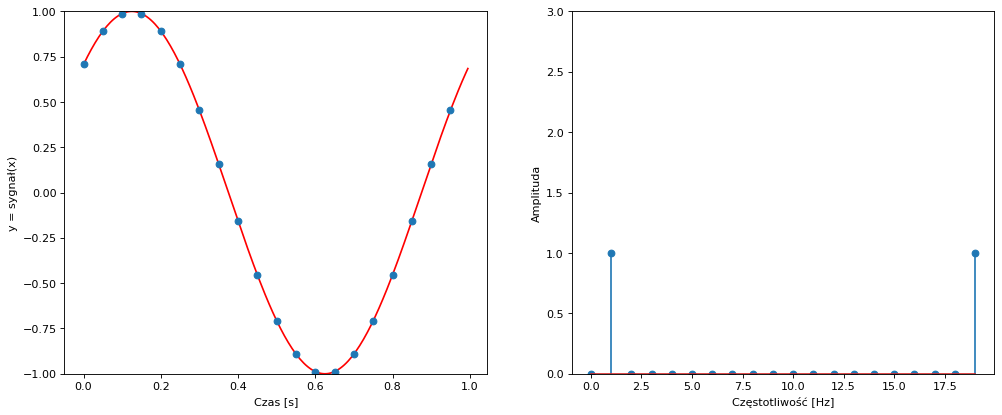

In [9]:
# faza = pi/4
signals(f=1.0, w=20)

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

Nie (w obrębie błędu operacji na liczbach zmiennoprzecinkowych)

In [59]:
# wygeneruj wektor x
x = random.random(10)

In [60]:
# oblicz fft z x
fft = fft.fft(x)

In [61]:
# oblicz ifft
ifft = np.fft.ifft(fft)

In [62]:
#porownaj x z ifft(fft(x)), wystarczy print
print(x == ifft)
print(x)
print(ifft)

[False False False False False False False False False False]
[0.79098297 0.78076332 0.33525359 0.59317999 0.83169757 0.136244
 0.55248199 0.15795275 0.06737442 0.86903206]
[0.79098297+0.j 0.78076332+0.j 0.33525359+0.j 0.59317999+0.j
 0.83169757+0.j 0.136244  +0.j 0.55248199+0.j 0.15795275+0.j
 0.06737442+0.j 0.86903206+0.j]
